\section{Modelo de corrección ionosférica para receptores de frecuencia sencilla}

Los planteamientos de este documento, tienen como proposito presentar las ideas detrás de un modelo empirico de correccion ionosférica para receptores de una sola frecuencia, a partir de relaciones matemáticas de los observables de relación señal a ruido, elevación y azimut de satélites desde la pisición del receptor.


In [6]:
import os
import urllib2, urllib
%run -i ../code/multirover4.py


filename = 'ifsc0101.zip'
down_path = os.getcwd()+"/data/"
simu_path = os.getcwd()+"/Temp_Simul_data/"

url = "ftp://geoftp.ibge.gov.br/informacoes_sobre_posicionamento_geodesico/rbmc/dados/2017/010/ifsc010.zip"
if file_url_exist(url):   
    
    makedir(down_path)
    makedir(simu_path)
    
    # FIRST VERSION
    #download(url, filename, dest_dir=folderpath)
    
    # OPTIMIZED VERSION
    urlretrieve(urllib2_request=url, filepath=down_path+filename)
    print "finish"
    unzip(filename=filename, source_dir=down_path, dest_dir=simu_path)

else:
    print "jodido"

jodido


In [7]:
os.path.exists(down_path+filename)

False

In [2]:
%run -i ../code/multirover4.py


dia1 = "010"
dian = "010"
ano = "2017"
# Ubicacion de la Rinex local DB 
Rinex_dataBase      = "../../new_data"
Simu_Folder         = getcwd() +"/" + "Temp_Simul_data"

parejas_kmz = {}

parejas_kmz[0] = ("OLVN", "AIRS", "NWBL",)
parejas_kmz[1] = ("BARA", "TGDR", "JME2",)
parejas_kmz[2] = ("ljrn", "p553", "p554", "fzhs",)
parejas_kmz[3] = ("CN20", "TGPM",)
parejas_kmz[5] = ('TGMX', 'UNPM',)
#parejas_kmz[4] = ('BELE', 'BEPA',)

RinexDB = descarga_Rinex_Compri(Rinex_dataBase, parejas_kmz, dia1, dian, ano)
## Leer los rinex almacenado en mi equipo
RinexDB = read_Rinex_Compri(Rinex_dataBase, parejas_kmz)



 Descargando Nuevos Archivos ....
************************

	 [Estacion] 	 [dia GPS] 		 [RESULTADO]
	 olvn
			 010 		 No encontrados Ficheros ['d']
	 airs
			 010 		 No encontrados Ficheros ['d']
	 nwbl
			 010 		 Descarga Exitosa!!!
	 bara
			 010 		 Descarga Exitosa!!!
	 tgdr
			 010 		 Descarga Exitosa!!!
	 jme2
			 010 		 Descarga Exitosa!!!
	 ljrn
			 010 		 Descarga Exitosa!!!
	 p553
			 010 		 Descarga Exitosa!!!
	 p554
			 010 		 Descarga Exitosa!!!
	 fzhs
			 010 		 Descarga Exitosa!!!
	 cn20
			 010 		 Descarga Exitosa!!!
	 tgpm
			 010 		 Descarga Exitosa!!!
	 tgmx
			 010 		 Descarga Exitosa!!!
	 unpm
			 010 		 Descarga Exitosa!!!
Descarga Finalizada!! 



In [57]:
extract_from_zip("bele0100.17d.zip", Rinex_dataBase, Simu_Folder)

../../new_data/bele0100.17d.zip
mv /home/zenbook/Desktop/0_bitbucket/repo/Desarrollo_Actual/Temp_Simul_data/bele0101.17o /home/zenbook/Desktop/0_bitbucket/repo/Desarrollo_Actual/Temp_Simul_data/bele0100.17o
mv /home/zenbook/Desktop/0_bitbucket/repo/Desarrollo_Actual/Temp_Simul_data/bele0101.17n /home/zenbook/Desktop/0_bitbucket/repo/Desarrollo_Actual/Temp_Simul_data/bele0100.17n


## Leyendo ficheros rinex de prueba

In [12]:
import numpy as np

import gpstk
import matplotlib.pyplot as plt
from IPython.display import display, HTML 
%matplotlib inline
%run -i ../code/multirover4.py
%run -i ../code/Iono_empiric.py

pd.set_option("max_r", 10)

navfile = "../../NavFiles/bara0100.17n"
obsfile = "../../NavFiles/bara0100.17o"

data, bcestore, rec_pos = rinex_to_dataframe_ionosfe(obsfile, navfile)
df = data[["gps_sow", "C1", "prns_pos", "prns", "prns_az", "prns_elev", "Iono", "S1"]]

WARNING! observation `C2` no present in file ../../NavFiles/bara0100.17o


## Inspeccionando ficheros rinex

In [13]:
inspect_rinex(obsfile, navfile)

receiver position lat=18.208600, lon=-71.098000, alt=77.999969
WARNING! observation `C2` no present in file ../../NavFiles/bara0100.17o
Time of observation 2457764 00000000 0.000000000000000 GPS
SatID GPS  GLON 	   P1 	   P2 	   L1 	   L2 	   C1 	   S1 	   S2 
   3  True False      0.000 23266960.980 122268660.439 95274334.311 23266953.445     43.800     27.200 
   8  True False      0.000 22526837.387 118379246.956 92243676.626 22526831.078     44.900     32.100 
   9  True False      0.000 24890618.332 130801072.963 101922922.703 24890614.563     37.600     19.300 
  14  True False      0.000 22573621.133 118625250.336 92435246.721 22573617.227     44.200     27.800 
  16  True False      0.000 20953910.492 110113664.499 85802836.822 20953907.625     52.000     40.100 
  21  True False      0.000 26187365.738 137615560.266 107232900.174 26187363.133     40.500     19.600 
  22  True False      0.000 23159273.695 121702843.987 94833368.206 23159272.234     43.600     28.100 
  23  Tru

In [14]:
df2 = df[["prns", "S1", "prns_elev", "prns_az", "Iono", "gps_sow"]]
df2

In [15]:
def weight(x):
    #print np.shape(x)#, x[1]
    #print len(x["prns"]), len(x["S1"])
    #print np.shape(len(x[0])*np.exp2(-x[1], x[2]))
    N = np.shape(x[0])[0]
    return pd.Series([N*np.exp(-x[1]/x[2])])

def rel(x):
    N = np.shape(x[0])[0]
    return pd.Series([x[2]])

# Trabajando apply sobre pandas dataframes y series
# http://www.ritchieng.com/pandas-apply/
# http://stackoverflow.com/questions/12182744/python-pandas-apply-a-function-with-arguments-to-a-series

df2 = df2.assign(weight = df2.apply(weight, axis=1))
df2 = df2.assign(rel_az_el = df2.apply(rel, axis=1))

/home/zenbook/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in exp


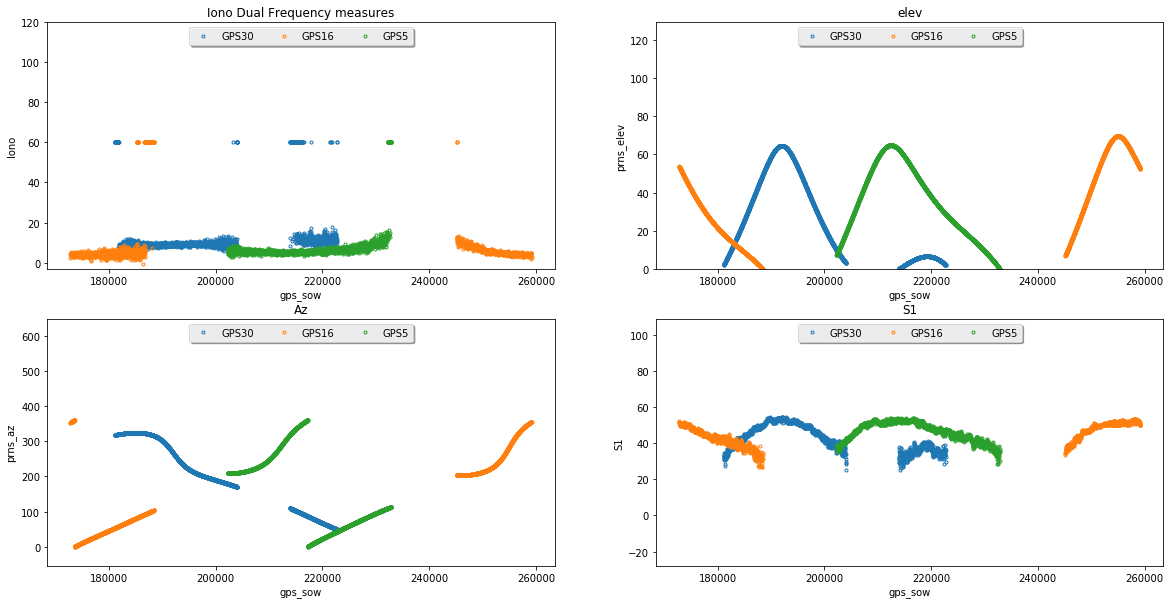

In [17]:
fig_size = (20, 10)
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(221)

#plot_from_gps_dataframe(df, x_var="gps_sow", y_var="S1", legend="prns", title_plot="S1 measures")
plot_from_gps_dataframe(df2, x_var="gps_sow", y_var="Iono", legend="prns", title_plot="Iono Dual Frequency measures")

ax = fig.add_subplot(222)
plot_from_gps_dataframe(df2, x_var="gps_sow", y_var="prns_elev", legend="prns", title_plot="elev")

ax = fig.add_subplot(223)
plot_from_gps_dataframe(df2, x_var="gps_sow", y_var="prns_az", legend="prns", title_plot="Az")

ax = fig.add_subplot(224)
plot_from_gps_dataframe(df2, x_var="gps_sow", y_var="S1", legend="prns", title_plot="S1")


In [18]:
def rel(x):
    N = np.shape(x[0])[0]
    return pd.Series([(0.7)*(-N + np.random.normal(x[1], 1)*(np.exp(-x[2]/x[1])))])

#def S1_pow(x):
#    return pd.Series([(x[1])*np.exp(-x[2]/x[1])**2])

def S1_pow(x):
    pot = 2
    N = np.shape(x[0])[0]
    y = (N - x[2]/x[1] + np.random.normal(N, 2)*np.exp(-x[2]/x[1])**3)/2
    return pd.Series([y])

def rel_slip(x):
    N = np.shape(x[0])[0]
    return pd.Series([0.7*(-N + (x[3])*np.random.normal(x[1], 1)*np.exp(-x[2]/x[1]))])

df2 = df2.assign(rel_S1 = df2.apply(rel, axis=1))
df2 = df2.assign(S1_pow = df2.apply(S1_pow, axis=1))
df2 = df2.assign(rel_Slip = df2.apply(rel_slip, axis=1))

## Relaciones matematicas para el Modelo empirico funcional hasta el momento

Hasta el momento, la gráfica de la Izquerda que obedece a la relación:
    
\begin{equation}
   Iono_{empiric} = K_a*(N_{sats} + RND*e^{-Prns_{elev}/SNR1})
\end{equation}


Donde para la variable aleatoria RND
* $\mu$: SNR1
* $\sigma$: kb=2 aprox.

Presenta similaridades con la corrección ionosférica de doble frecuencia, obtenida para los satélites **5** y **16**. (Gráfica de la derecha)

In [19]:
fig_size = (25, 10)
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(221)

plot_from_gps_dataframe(df2, x_var="gps_sow", y_var="rel_S1", legend="prns", title_plot="rel_S1")#, ylim=[3, 27])

ax = fig.add_subplot(222)
plot_from_gps_dataframe(df2, x_var="gps_sow", y_var="Iono", legend="prns", title_plot="Iono", ylim=[3, 27])
#plot_from_gps_dataframe(df2, x_var="gps_sow", y_var="rel_S1", legend="prns", title_plot="rel_S1")

ax = fig.add_subplot(223)
plot_from_gps_dataframe(df2, x_var="gps_sow", y_var="prns_az", legend="prns", title_plot="Azimut")

ax = fig.add_subplot(224)
plot_from_gps_dataframe(df2, x_var="gps_sow", y_var="S1_pow", legend="prns", title_plot="S1_pow", ylim=[3, 27])

## Evento de "Cycle Slip"

Creeria que en dos instantes de tiempo se pierde el enganche de fase de los satelites **16** y **5**.

Hasta el momento creeria que si fuese posible poder removerlo **(No rengo gran conocimiento del tema aún)**, una relación para el retraso ionosférico sería

\begin{equation}
   Iono_{empiric} = K_a*(N_{sats} + RND(\mu, \sigma)*e^{-Prns_{elev}/SNR1})
\end{equation}


In [20]:
fig_size = (20, 10)
fig = plt.figure(figsize=fig_size)

ax = fig.add_subplot(211)
plot_from_gps_dataframe(df2, x_var="gps_sow", y_var="prns_az", legend="prns", title_plot="Az")

ax = fig.add_subplot(212)
plot_from_gps_dataframe(df2, x_var="gps_sow", y_var="rel_Slip", legend="prns", title_plot="relacion CycleSlip", ylim=[3, 27])